In [173]:
from RuleTree.tree.RuleTreeClassifier import RuleTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import itertools
import pandas as pd
import numpy as np
from RuleTree.stumps.instance_stumps import * 

In [174]:
pt_stump = pt_stump_call()
obl_pt_stump = obl_pt_stump_call()
proximity_stump = multi_pt_stump_call()
oblique_proximity_stump = multi_obl_pt_stump_call()

In [175]:
df_train = pd.read_csv('datasets/split_datasets/mstz_cifar10_train_embedding.csv')
df_test = pd.read_csv('datasets/split_datasets/mstz_cifar10_test_embedding.csv')

In [176]:
X_train = df_train.drop(columns = ['label']).values
y_train = np.array(df_train.label)

In [177]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_train is your DataFrame and contains a 'label' column
X_train = df_train.drop(columns=['label']).values
y_train = np.array(df_train.label)

# Convert to DataFrame for easier manipulation, retaining original indices
df_train_filtered = df_train.drop(columns=['label']).copy()
df_train_filtered['label'] = y_train  # Ensure 'label' is included

# Add original indices
df_train_filtered['original_index'] = df_train.index

# Reverse the DataFrame before sampling
df_train_filtered_reversed = df_train_filtered.iloc[::-1]

# Stratified sampling: Split the data with reversed order
df_sampled, _ = train_test_split(df_train_filtered_reversed, test_size=1000, stratify=df_train_filtered_reversed['label'], train_size=2000, random_state=43)

# Extract the sampled data: original indices, labels, and features
original_indices = np.array(df_sampled.original_index)
y_sampled = np.array(df_sampled.label)
X_sampled = df_sampled.drop(columns=['label', 'original_index']).values


In [178]:
# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=4, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[pt_stump])
clf.fit(X_sampled, y_sampled)

In [179]:
clf.print_rules(clf.get_rules())

|--- P_718 <= 5.271	2000
|   |--- P_1008 <= 2.049	208
|   |   |--- P_442 <= 1.528	3
|   |   |    output: 0
|   |   |--- P_442 > 1.528
|   |   |    output: 4
|   |--- P_1008 > 2.049
|   |   |--- P_1120 <= 0.197	205
|   |   |    output: 0
|   |   |--- P_1120 > 0.197
|   |   |   |--- P_8 <= 0.575	204
|   |   |   |    output: 1
|   |   |   |--- P_8 > 0.575
|   |   |   |    output: 8
|--- P_718 > 5.271
|   |--- P_1275 <= 4.08	1792
|   |   |--- P_1176 <= 0.912	200
|   |   |   |--- P_1176 <= 0.452	2
|   |   |   |    output: 3
|   |   |   |--- P_1176 > 0.452
|   |   |   |    output: 4
|   |   |--- P_1176 > 0.912
|   |   |   |--- P_1179 <= 0.635	198
|   |   |   |    output: 4
|   |   |   |--- P_1179 > 0.635
|   |   |   |    output: 6
|   |--- P_1275 > 4.08
|   |   |--- P_436 <= 4.336	1592
|   |   |    output: 1
|   |   |--- P_436 > 4.336
|   |   |   |--- P_427 <= 4.184	1402
|   |   |   |    output: 7
|   |   |   |--- P_427 > 4.184
|   |   |   |    output: 2


In [ ]:
max threshold

In [196]:
pivots_sampled = [718, 1008, 1120, 442, 1275, 436, 1176]
[original_indices[pivots_sampled]]


[array([5041, 2862,  480,  433, 3698,  865, 2365])]

In [197]:
y_train[original_indices[pivots_sampled]], y_sampled[pivots_sampled]

(array([8, 4, 0, 0, 6, 1, 3]), array([8, 4, 0, 0, 6, 1, 3]))

In [182]:
# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=4, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[proximity_stump], prune_useless_leaves=True)
clf.fit(X_sampled, y_sampled)

In [183]:
clf.print_rules(clf.get_rules())


|--- closer to 1297 	2000
|   |--- closer to 1297 	1797
|   |   |--- closer to 291 	204
|   |   |   |--- closer to 1549 	190
|   |   |   |    output: 9
|   |   |   |--- closer to 291
|   |   |   |    output: 7
|   |   |--- closer to 1074
|   |   |   |--- closer to 423 	14
|   |   |   |    output: 7
|   |   |   |--- closer to 1074
|   |   |   |    output: 5
|   |--- closer to 1368
|   |   |--- closer to 1297 	1593
|   |   |   |--- closer to 1297 	1396
|   |   |   |    output: 2
|   |   |   |--- closer to 1182
|   |   |   |    output: 6
|   |   |--- closer to 1368
|   |   |    output: 1
|--- closer to 1540
|   |--- closer to 1220 	203
|   |    output: 8
|   |--- closer to 8
|   |   |--- closer to 1849 	10
|   |   |   |--- closer to 1849 	7
|   |   |   |    output: 8
|   |   |   |--- closer to 296
|   |   |   |    output: 9
|   |   |--- closer to 8
|   |   |   |--- closer to 442 	3
|   |   |   |    output: 0
|   |   |   |--- closer to 8
|   |   |   |    output: 1


In [190]:
pivots_sampled = [1297,1540,8, 291,1549,1720,1368,1220,1849]
[original_indices[pivots_sampled]]

[array([ 364,  787,  792, 2305, 5658, 3275,  737, 5269, 5380])]

In [191]:
y_train[original_indices[pivots_sampled]]

array([0, 1, 1, 3, 9, 5, 1, 8, 8])

## UNIVARIATE

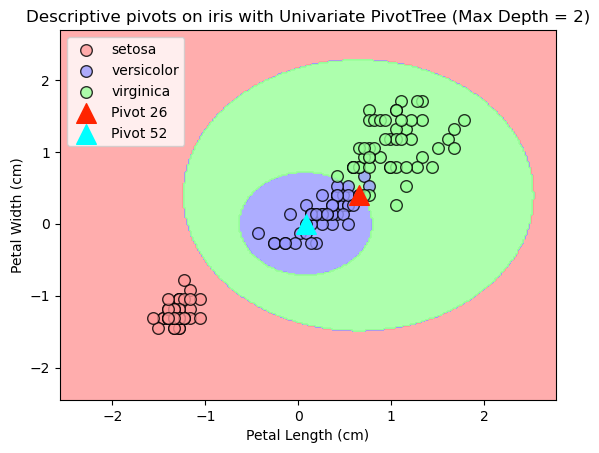

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_step = 0.02

# Load data
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Use soft red, soft blue, and soft green for area colors
area_colors = ['#ff9999', '#9999ff', '#99ff99']

label_cmap = ListedColormap(area_colors)  # Use the same colors for labels and areas

# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=2, 
                         random_state=1,
                         distance_measure='euclidean',
                         base_stumps=[pt_stump])
clf.fit(X, y)

# Plot the decision boundary with soft area colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=label_cmap, alpha=0.8)

# Plot the training points with soft area colors
for i, color in zip(range(n_classes), area_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=label_cmap,
                edgecolors='k', s=70, alpha=0.8)

# Highlight sample 26 and sample 50 with stars


plt.scatter(X[91, 0], X[91, 1], c='#FF2400', marker='^', s=200, label='Pivot 26')
plt.scatter(X[149, 0], X[149, 1], c='#00FFFF', marker='^', s=200, label='Pivot 52')
#plt.scatter(X[17, 0], X[17, 1], c='#32CD32', marker='^', s=200, label='Pivot 17')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Descriptive pivots on iris with Univariate PivotTree (Max Depth = 2)')
plt.legend()
plt.show()


In [72]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
clf.print_rules(clf.get_rules())

|--- P_91 <= 1.884	150
|   |--- P_149 <= 0.718	100
|   |    output: 1
|   |--- P_149 > 0.718
|   |    output: 2
|--- P_91 > 1.884
|    output: 0


## OBLIQUE 

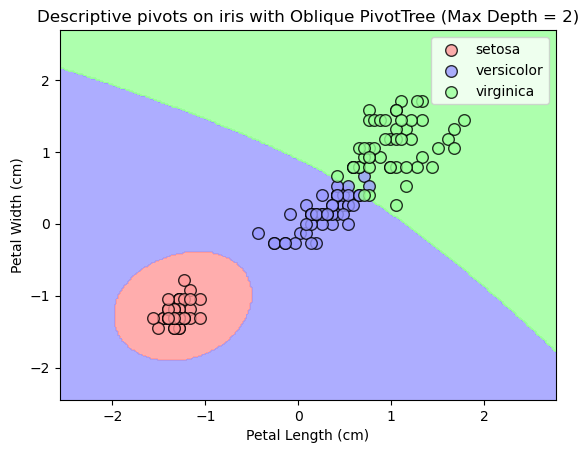

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_step = 0.02

# Load data
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Use soft red, soft blue, and soft green for area colors
area_colors = ['#ff9999', '#9999ff', '#99ff99']

label_cmap = ListedColormap(area_colors)  # Use the same colors for labels and areas

# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=2, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[obl_pt_stump])
clf.fit(X, y)

# Plot the decision boundary with soft area colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=label_cmap, alpha=0.8)

# Plot the training points with soft area colors
for i, color in zip(range(n_classes), area_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=label_cmap,
                edgecolors='k', s=70, alpha=0.8)

# Highlight sample 26 and sample 50 with stars

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Descriptive pivots on iris with Oblique PivotTree (Max Depth = 2)')
plt.legend()
plt.show()


In [55]:
clf.print_rules(clf.get_rules())

|--- -0.258 * P_89 + 0.844 * P_45 <= 2.383	150
|    output: 0
|--- -0.258 * P_89 + 0.844 * P_45 > 2.383
|   |--- -0.33 * P_114 + 0.882 * P_45 <= -0.185	100
|   |    output: 1
|   |--- -0.33 * P_114 + 0.882 * P_45 > -0.185
|   |    output: 2


## PROXIMITY

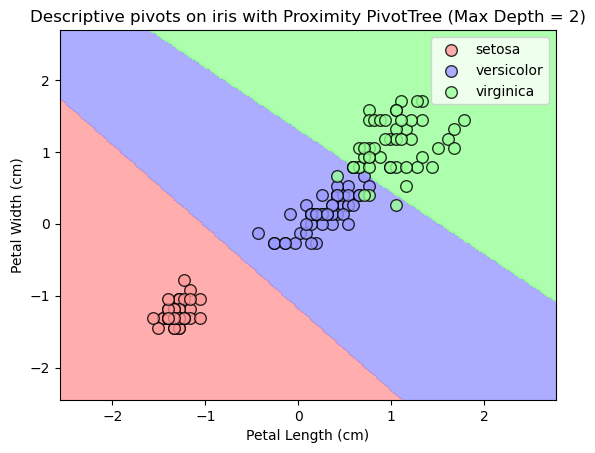

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_step = 0.02

# Load data
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Use soft red, soft blue, and soft green for area colors
area_colors = ['#ff9999', '#9999ff', '#99ff99']

label_cmap = ListedColormap(area_colors)  # Use the same colors for labels and areas

# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=2, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[proximity_stump])
clf.fit(X, y)

# Plot the decision boundary with soft area colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=label_cmap, alpha=0.8)

# Plot the training points with soft area colors
for i, color in zip(range(n_classes), area_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=label_cmap,
                edgecolors='k', s=70, alpha=0.8)


plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Descriptive pivots on iris with Proximity PivotTree (Max Depth = 2)')
plt.legend()
plt.show()


In [57]:

clf.print_rules(clf.get_rules())

|--- closer to 93 	150
|    output: 0
|--- closer to 35
|   |--- closer to 35 	100
|   |    output: 1
|   |--- closer to 4
|   |    output: 2
